In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Harmonic Mean Filter 
Let, an array A = [x1,x2,x3...xn] where n = size of A then, Harmonic Mean (HM) can be calculated as follows:
        
        HM = n / [(1/x1) + (1/x2) + (1/x3) + ... + (1/xn)]

The Harmonic Mean Filter works well for salt noise, but fails for pepper noise

In [38]:
def harmonic_filter(image, mask_size):
   filtered_image = image.copy()
   height, width = image.shape
   offset = mask_size // 2
   num_of_pixels = mask_size * mask_size

   for r in range(height):
      for c in range(width):
        pixel = 0
        for x in range(-offset, offset+1):
          for y in range(-offset, offset+1):
            if(r+x >= 0  and r+x < height and c+y >= 0 and c+y < width):
              pixel += float(1 / (image[r+x, c+y] + 1e-4))
      pixel = num_of_pixels / pixel
      filtered_image[r,c] = 255 if pixel>255 else pixel

   return np.uint8(filtered_image)

# Geometric Mean Filter

Let, an array A = [x1,x2,x3...xn] where n = size of A then, Harmonic Mean (GM) can be calculated as follows:
            GM = (x1 * x2 * x3 * ... * xn)^(1/n)

In [51]:
def geometric_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixel = 1
            count = 0
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if r + x >= 0 and r + x < height and c + y >= 0 and c + y < width:
                        if image[r + x, c + y]:
                            count += 1
                            pixel = pixel * int(image[r + x, c + y])
            count = 1 if count == 0 else count
            filtered_image[r, c] = pixel ** (1 / count)

    return np.uint8(filtered_image)

# Function for adding salt and pepper noise

In [52]:
def add_salt_pepper(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for i in range (int(noise_amount)):
        index = []
        for x in range(1,5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255
    
    return noisy_image

# Function to calculate PSNR

In [53]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1-image2) ** 2)

    if(mse == 0):
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)

    return round(psnr, 2)

# Load Image

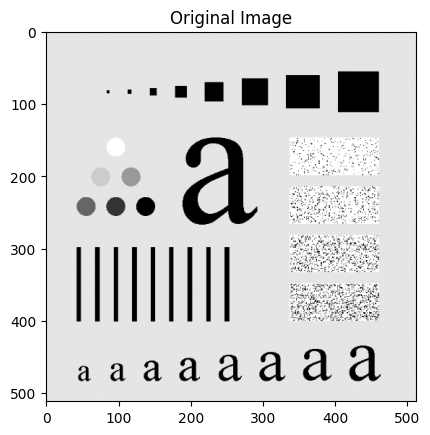

In [42]:
original_image = cv2.imread('Characters_Test_Pattern.tif', cv2.IMREAD_GRAYSCALE)
original_image = cv2.resize(original_image, (512,512))

plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.show()

# Adding Noise to Image

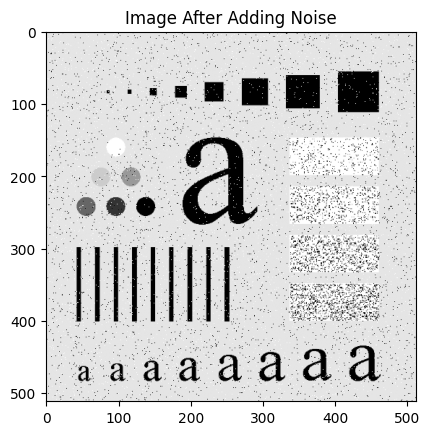

PSNR:  19.09


In [57]:
noisy_image = add_salt_pepper(original_image, 1.5)
plt.imshow(noisy_image, cmap = 'gray')
plt.title('Image After Adding Noise')
plt.show()

psnr_of_noisy_image = compute_psnr(original_image,noisy_image)
print ('PSNR: ',psnr_of_noisy_image)


# Apply harmonic mean filter

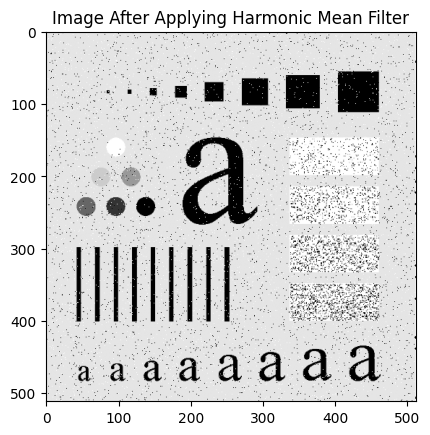

PSNR:  39.21


In [58]:
mask_size = 3
harmonic_filtered_image = harmonic_filter(noisy_image, mask_size)
plt.imshow(harmonic_filtered_image, cmap = 'gray')
plt.title('Image After Applying Harmonic Mean Filter')
plt.show()

psnr_of_filtered_image = compute_psnr(noisy_image, harmonic_filtered_image)
print ('PSNR: ',psnr_of_filtered_image)

# Apply Geometric Mean Filter

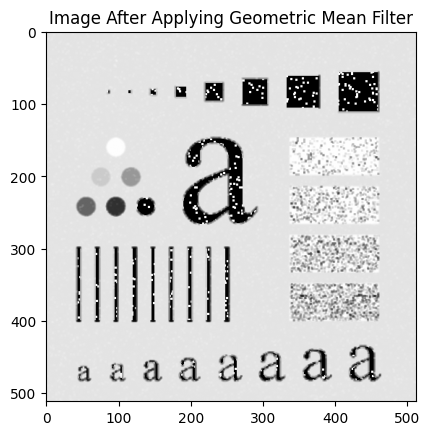

PSNR:  15.3


In [59]:
mask_size = 3
geometric_filtered_image = geometric_filter(noisy_image,mask_size)
plt.imshow(geometric_filtered_image, cmap = 'gray')
plt.title('Image After Applying Geometric Mean Filter')
plt.show()

psnr_of_filtered_image = compute_psnr(noisy_image, geometric_filtered_image)
print ('PSNR: ',psnr_of_filtered_image)